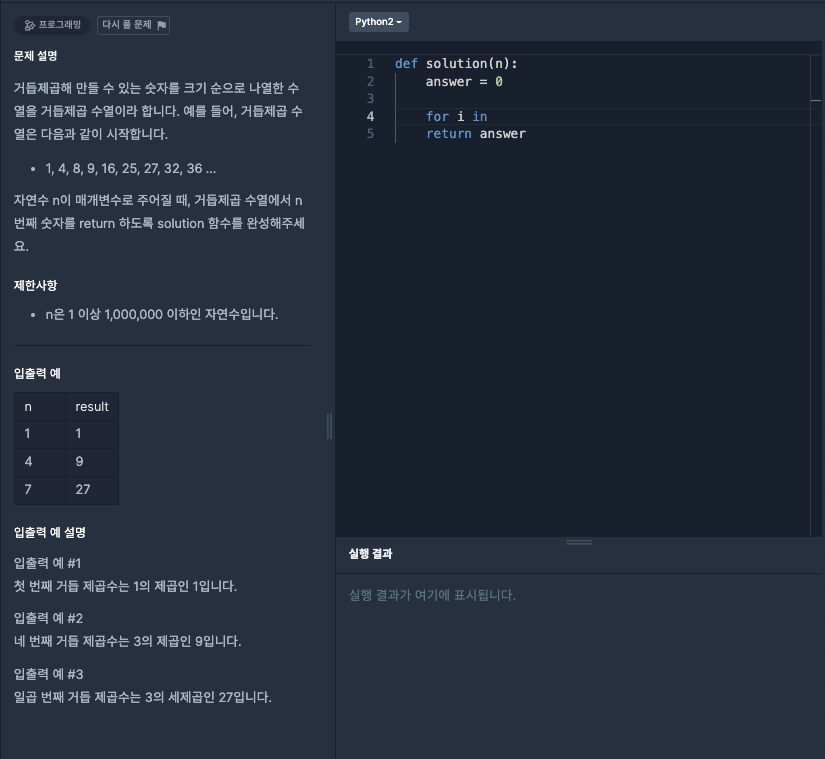

In [3]:
def solution(n):

  if n==1:
    return 1
  
  list = [1]
  num = 2

  while True:
    if len(list) == n and num ** 2 > max(list):
      break
    i = 2
    while True:
      if len(list) == n and max(list) < num**i:
        break
      elif len(list) == n and num**i not in list and max(list) > num**i:
        list.pop(-1)
        list.append(num**i)
        list.sort()
      else:
        if num**i not in list:
          list.append(num**i)
          list.sort()
      i +=1
    num += 1

  # print('list', list)
  return list[n-1]

In [7]:
solution(10)

list [1, 4, 8, 9, 16, 25, 27, 32, 36, 49]


49

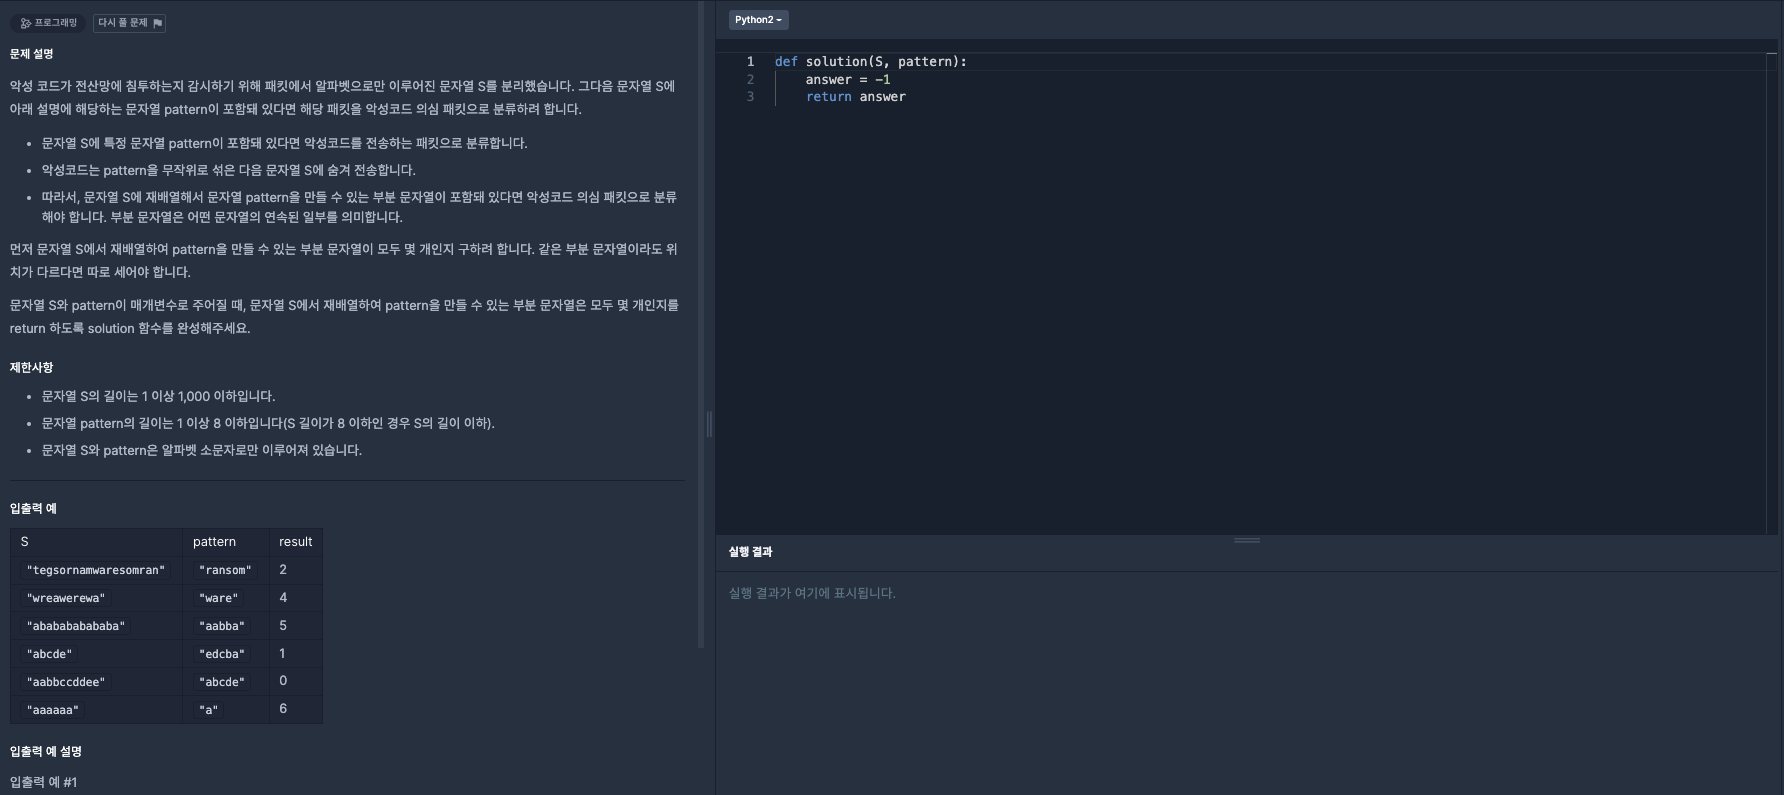


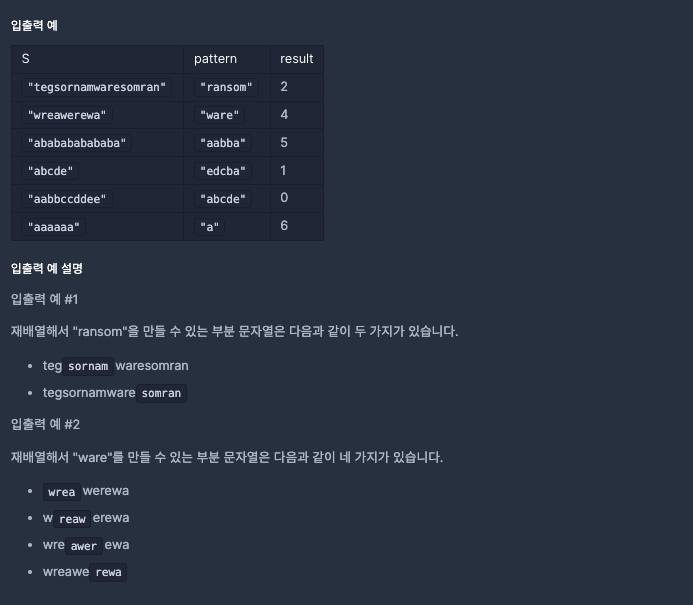

In [ ]:
def solution(S, pattern):
  pattern_len = len(pattern)
  total_len = len(S)

  count = 0
  for i in range(total_len - pattern_len + 1):
    cand = S[i:i+pattern_len]

    if sorted(list(cand)) == sorted(list(pattern)):
      count +=1
  
  return count

In [ ]:
S = 'tegsornamwaresomran'
pattern = 'ransom'
solution(S, pattern)

2

In [ ]:
S = 'wreawerewa'
pattern = 'ware'
solution(S, pattern)

4

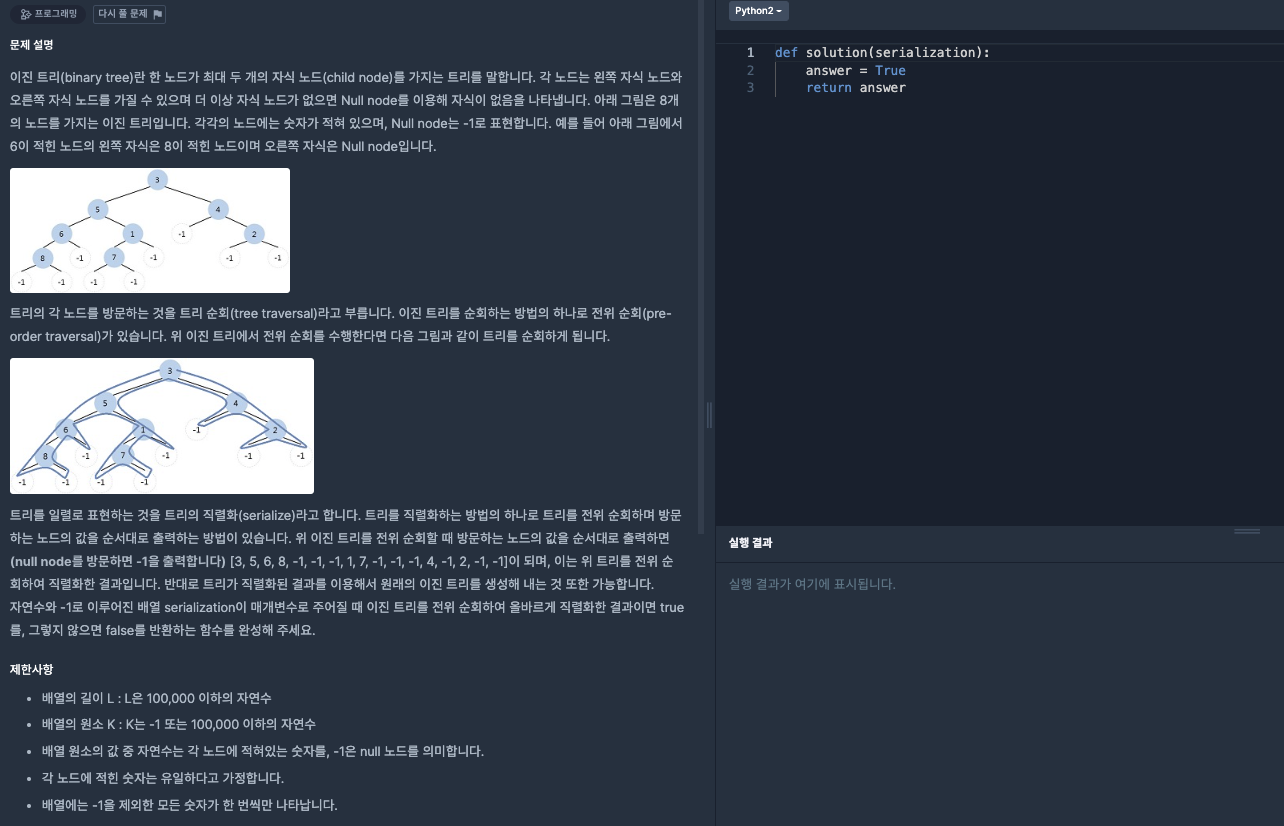

In [ ]:
# https://algodaily.com/challenges/serialize-and-deserialize-a-binary-tree/python
def solution(serialization):

  tree = []
  orig_serialization = serialization[:]

  def deserialize(serialized):
      # Node definition
      class Node:
          def __init__(self, val):
              self.val = val
              self.left = None

      def generate_tree(nodes):
          curr = nodes.pop(0)
          tree.append(curr)

          if curr == -1:
              return None
          else:
              node = Node(int(curr))
              node.left = generate_tree(nodes)
              node.right = generate_tree(nodes)
              return node

      return generate_tree(serialized), tree
    
  node, tree = deserialize(serialization)

  # print('* serialization', orig_serialization)
  # print('* generated tree', tree)
  if orig_serialization == tree:
    return True
  else:
    return False


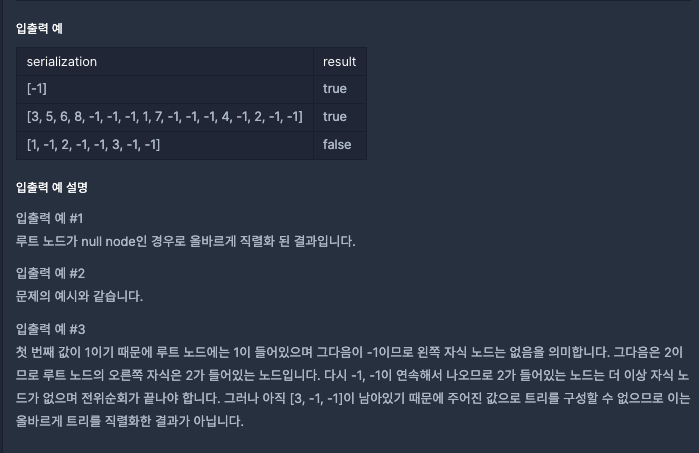

In [ ]:
serialization = [-1, -1]
solution(serialization)

* serialization [-1, -1]
* generated tree [-1]


False

In [ ]:
serialization = [ -1]
solution(serialization)

* serialization [-1]
* generated tree [-1]


True

In [ ]:
serialization = [3,5,6,8,-1,-1,-1,1,7,-1,-1,-1,4,-1,2,-1,-1]
solution(serialization)

* serialization [3, 5, 6, 8, -1, -1, -1, 1, 7, -1, -1, -1, 4, -1, 2, -1, -1]
* generated tree [3, 5, 6, 8, -1, -1, -1, 1, 7, -1, -1, -1, 4, -1, 2, -1, -1]


True

In [ ]:
serialization = [1,-1,2,-1,-1,3,-1,-1]
solution(serialization)

* serialization [1, -1, 2, -1, -1, 3, -1, -1]
* generated tree [1, -1, 2, -1, -1]


False

## 2022-11월 문제 풀이

In [37]:
def solution(grades, weights, threshold):
    grade_dict = {'A+':10, 'A0':9, 'B+':8, 'B0':7, 'C+':6, 'C0':5, 'D+':4, 'D0':3, 'F':0}

    total_score = 0
    for i, grade in enumerate(grades):
        total_score += grade_dict[grade] * weights[i]
        # print(f'{grade}, {grade_dict[grade]}, {weights[i]}')

    answer = total_score - threshold
    # print('total score:', total_score)
    return answer

In [ ]:
def solution(n):
    answer = 0
    dragon_num = 0
    dragon_num_finish = 0

    dragon = [] # max:4
    dragon_egg = [2] # 부화 : 2일 뒤

    for day in range(n + 1):
        if day == 0:
            continue
        
        if len(dragon_egg) > 0:
            dragon_egg_new = []

            for i in range(len(dragon_egg)):
                dragon_egg_i = dragon_egg[i] - 1
                # 드래곤 부화
                if dragon_egg_i == 0:
                    dragon_num +=1
                    dragon.append(4)
                # 일 경과
                else:
                    dragon_egg_new.append(dragon_egg_i)
            dragon_egg = dragon_egg_new[:]

        if len(dragon) > 0:
            dragon_new = []
            for i in range(len(dragon)):
                dragon_i = dragon[i] - 1 # 3 2 1 0
                # 알 낳기
                dragon_egg.append(2)
                # 4일 경과
                if dragon_i == 0:
                    dragon_num -=1
                    dragon_num_finish += 1
                    continue
                dragon_new.append(dragon_i)
            dragon = dragon_new[:]

        # print('# day', day)
        # print('드래곤 수 (끝)', dragon_num_finish)
        # print('드래곤 수', dragon_num)
        # print('드래곤 알 수', len(dragon_egg))
    dragon_egg_num = len(dragon_egg)
    answer = dragon_num + dragon_num_finish + dragon_egg_num

    return answer

In [ ]:
import itertools

def solution(p):
    answer = 0

    perms = list(itertools.permutations(p, len(p)))
    perms = set(perms)
    max_inc_num = 0

    for perm in perms:
        inc_num = 0

        i = 0 
        j = len(perm) -i -2

        while i < j:
            if perm[i] < perm[i+1]:
                inc_num +=1
            if perm[j] < perm[j+1]:
                inc_num +=1
            i +=1
            j -=1
        if max_inc_num < inc_num:
            max_inc_num = inc_num

    answer = max_inc_num
    return answer